In [163]:
import re
import pandas as pd
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from pymorphy2 import MorphAnalyzer
import numpy as np
import matplotlib.pyplot as plt

In [164]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Александр\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [165]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Александр\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Получаем на вход список площадок с метаданными от алгоритма поиска площадок

In [166]:
#предобработка данных:

In [167]:
Meta = pd.read_excel('parsed_meta2.xlsx')

In [168]:
Meta.rename(columns={'Описание': 'Метаданные'}, inplace=True)

In [169]:
Meta.fillna('unknown',inplace=True) # В случае, если у сайта нет метаданных, но он полезен, лучше его не удалять, а маркировать соответствующим образом.
#dropna(subset=['Метаданные'],inplace=True) fillna('unknown')

In [170]:
Meta

,Unnamed: 0,Наименование,URL,Метаданные
0,0,.,https://1001krep.ru,"Компания ""1001 КРЕПЕЖ"" - оптовые поставки креп..."
1,1,.,https://www.etm.ru,unknown
2,2,.,https://www.Super-krepeg.ru,Производство и продажа металлических изделий с...
3,3,.,https://ms-74.ru,"Автозапчасти для дорожно-строительной техники,..."
4,4,.,https://msk.pulscen.ru,"Цены на товары и услуги в разделах: материалы,..."
5,5,.,https://krep-shop.ru,Интернет-магазин KrepShop предлагает к продаже...
6,6,.,https://kran-master74.ru,"������� �����������, ��������� ������������, �..."
7,7,.,https://www.pulscen.ru,"Цены на товары и услуги в разделах: материалы,..."
8,8,.,https://Snabline.com,SNABLINE | Интернет-магазин | Лучшая цена на и...
9,9,.,https://seal-is.com,Компания СИАЛ занимается производством РТИ (ре...


In [157]:
bad_words = "[^_{|}~\"\-#$%&'()*+,./:;<=>?@[\]]+"

# Проводим морфологический анализ текста в метаданных

In [171]:
# Проводим морфологический анализ текста в метаданных
morph = MorphAnalyzer()
def token_only(text):
    text = re.sub(bad_words,' ',text)
    tokens = [word.lower() for sent in sent_tokenize(text) for word in word_tokenize(sent)]
    filtered_tokens = []
    for token in tokens:
        token = token.strip()
        token = morph.normal_forms(token)[0]
        filtered_tokens.append(token)
    return filtered_tokens

stopwords = stopwords.words('russian')
# stopwords.extend(['итог','руб','который','клиент'])
tfidf_vectorizer = TfidfVectorizer(smooth_idf=True,max_df=0.5,min_df=0.02,max_features=10000,
                                   stop_words=stopwords,
                                   use_idf=True,tokenizer=token_only, ngram_range=(1,4))
df_for_tfidf = Meta['Метаданные']
tfidf_matrix = tfidf_vectorizer.fit_transform(df_for_tfidf)

In [172]:
mbk  = MiniBatchKMeans(n_clusters=5,init='random').fit(tfidf_matrix)# Количество кластеров определено "экспертно". 
# как корректно определять кластера указано ниже
y_kmeansMBK = mbk.predict(tfidf_matrix)
Num = [] 
Num = [pt for pt in y_kmeansMBK]
df2 = {"Num_Cluster": Num}
dfMBK = pd.DataFrame(df2)
df = pd.concat([Meta,dfMBK], axis=1)
df.to_excel('Cluster.xlsx', index=False)

In [173]:
df

,Unnamed: 0,Наименование,URL,Метаданные,Num_Cluster
0,0,.,https://1001krep.ru,"Компания ""1001 КРЕПЕЖ"" - оптовые поставки креп...",3
1,1,.,https://www.etm.ru,unknown,2
2,2,.,https://www.Super-krepeg.ru,Производство и продажа металлических изделий с...,2
3,3,.,https://ms-74.ru,"Автозапчасти для дорожно-строительной техники,...",0
4,4,.,https://msk.pulscen.ru,"Цены на товары и услуги в разделах: материалы,...",3
5,5,.,https://krep-shop.ru,Интернет-магазин KrepShop предлагает к продаже...,0
6,6,.,https://kran-master74.ru,"������� �����������, ��������� ������������, �...",3
7,7,.,https://www.pulscen.ru,"Цены на товары и услуги в разделах: материалы,...",0
8,8,.,https://Snabline.com,SNABLINE | Интернет-магазин | Лучшая цена на и...,3
9,9,.,https://seal-is.com,Компания СИАЛ занимается производством РТИ (ре...,2



После анализа кластеров по вошедшим в них метаданным, наиболее релевантными считаем правильными кластера 2 и 3.

NB! - При большом количестве площадок, кластеров будет 20-30, в том числе 100% релевантные, 50% релевантные и точно нерелевантные.  

NB! ПРиведен пример кластеризации порталов на основе метаданных. В случае наличия маркировки наборов "правильных" метаданных, метод определения кластеров может быть  другим. 


Справочно - как определить количество кластеров? 
Количество кластеров определяется разово на максимально полных данных и может обновлятсья раз в полгода/год. 

1. Указываем в range начальное количество кластеров, конечное и шаг для перебора. Если нет одинаковых наборов метаданных, конечное кол-во кластеров = кол-ву наборов метаданных (объектов)
2. строим 
3. Определяем визуально, какое количество кластеров достаточно для анализа


NB! ПРиведен пример кластеризации порталов на основе метаданных. В случае наличия маркировки наборов "правильных" метаданных, метод определения кластеров может быть  другим. 

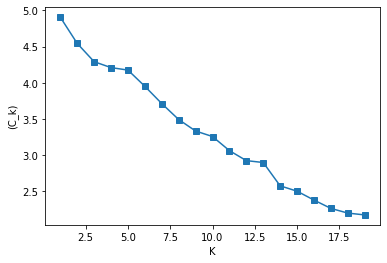

In [162]:
inertia = []
for k in range(1,20,1):
    mbk  = MiniBatchKMeans(n_clusters=k,init='random', random_state=1).fit(tfidf_matrix)
    inertia.append(np.sqrt(mbk.inertia_))
plt.plot(range(1,20,1),inertia,marker='s')
plt.xlabel('K')
plt.ylabel('(C_k)')
plt.show()